# Emotion Detector 

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import cv2
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

Using TensorFlow backend.


### Setting up dataset
- Performing above code we'll get three folders - <font color='steelblue'>['PrivateTest', 'PublicTest', 'Training']</font> each with six folders <font color='blue'>['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']</font>
- I will merge 'PrivateTest' & 'PublicTest' folders to create single folder <font color='steelblue'>'test'</font>

In [2]:
num_classes = 6
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = 'data\\train'
validation_data_dir = 'data\\test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


## EDA

In [3]:
path_test = os.getcwd() + '\\data\\train'
path_train = os.getcwd() + '\data\\test'

In [4]:
for mdir,subdir,files in os.walk(path_test):
    print(os.path.basename(mdir) + " : " + str(len(files)))

train : 0
Angry : 3995
Fear : 4097
Happy : 7215
Neutral : 4965
Sad : 4830
Surprise : 3171


In [5]:
for mdir,subdir,files in os.walk(path_train):
    print(os.path.basename(mdir) + " : " + str(len(files)))

test : 0
Angry : 958
Fear : 1024
Happy : 1774
Neutral : 1233
Sad : 1247
Surprise : 831


### Observation:
- In both train and test folders data is imbalanced due to disgust sub-folder.
- We can choose upsampling using data augmentation or discard it.

## Keras Custom VGG Model

In [9]:
model = Sequential()

# Block #1:
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))                 
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2:
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3:
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4:
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5:
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #6: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_27 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_28 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
__________




## Training our model

In [10]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint(os.getcwd()+"\\Trained Models\\emotion_vgg_6.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1794/1794 [==============================] - 2007s 1s/step - loss: 1.9590 - acc: 0.2035 - val_loss: 1.7477 - val_acc: 0.2488

Epoch 00001: val_loss improved from inf to 1.74767, saving model to C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\Trained Models\emotion_vgg_6.h5
Epoch 2/10
1794/1794 [==============================] - 2941s 2s/step - loss: 1.7534 - acc: 0.2422 - val_loss: 1.7441 - val_acc: 0.2496

Epoch 00002: val_loss improved from 1.74767 to 1.74413, saving model to C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\Trained Models\emotion_vgg_6.h5
Epoch 3/10
1794/1794 [==============================] - 2127s 1s/step - loss: 1.7494 - acc: 0.2487 - val_loss: 1.7351 - val_acc: 0.2488

Epoch 00003: val_loss improved from 1.74413 to 1.73512, saving model to C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\Trained Models\emotion_vgg_6.h5
Epoch 4/10
1794/1794 [==============================] - 2114s 1s/step - loss: 1.7422 - acc: 0.2

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 7067

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

Found 7067 images belonging to 6 classes.
Confusion Matrix
[[   0  165  781    0   11    1]
 [   0  253  763    0    8    0]
 [   0  200 1566    0    8    0]
 [   0  129 1090    0   14    0]
 [   0  117 1109    0   20    1]
 [   0  344  485    0    1    1]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
        Fear       0.21      0.25      0.23      1024
       Happy       0.27      0.88      0.41      1774
     Neutral       0.00      0.00      0.00      1233
         Sad       0.32      0.02      0.03      1247
    Surprise       0.33      0.00      0.00       831

    accuracy                           0.26      7067
   macro avg       0.19      0.19      0.11      7067
weighted avg       0.19      0.26      0.14      7067



In [14]:
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')
    plt.savefig('acc_vs_epochs.png')
    
    plt.figure()
    plt.plot(epochs, loss, 'r.')
    plt.plot(epochs, val_loss, 'r-')
    plt.title('Training and validation loss')
    plt.show()

    plt.savefig('loss_vs_epochs.png')

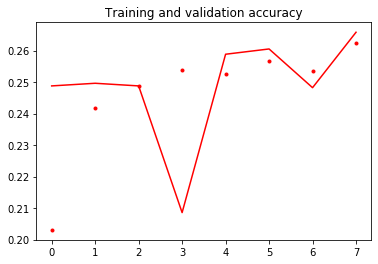

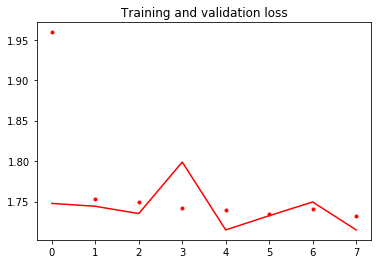

<Figure size 432x288 with 0 Axes>

In [15]:
plot_training(history)

### Loading our saved model

In [12]:
from keras.models import load_model

classifier = load_model(os.getcwd()+'\\Trained Models\\emotion_vgg_6.h5')

### Get our class labels

In [13]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 7067 images belonging to 6 classes.
{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}


### Testing on webcam


In [17]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier(os.getcwd()+'\\haarcascade_frontalface_default.xml')

def face_detector(img):
       
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
           

In [16]:
cap.release()
cv2.destroyAllWindows()      